<a href="https://colab.research.google.com/github/Matticus02/PythonPractice/blob/master/titanic_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction to Machine Learning**
First up, let's get google colabs working.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os

In [0]:
os.listdir('/content/gdrive/My Drive/Colab Notebooks/')

['Untitled0.ipynb',
 'Copy of Welcome To Colaboratory (2)',
 'strava_heatmap.ipynb',
 'Untitled1 (1).ipynb',
 'Copy of Welcome To Colaboratory (1)',
 'Untitled2.ipynb',
 'Copy of Welcome To Colaboratory',
 'Untitled1.ipynb',
 'Untitled3.ipynb',
 'Copy of titanic_ml',
 'test.csv',
 'train.csv',
 'titanic_ml.ipynb']

# 1. **Introduction**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# 1.1. Data
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

**1.1.1. Data Dictionary**

**Variable**:	**Definition**

survival:	Survival	
pclass:	Ticket class	
sex:	Sex	
Age:	Age in years	
sibsp:	# of siblings / spouses aboard the Titanic	
parch:	# of parents / children aboard the Titanic	
ticket:	Ticket number	
fare:	Passenger fare	
cabin:	Cabin number	
embarked:	Port of Embarkation	



# **2. Data Exploration**

In [0]:
# Pandas is a user friendly and efficient library for working with data in Python.
import pandas as pd

#Read the training dataset into memory
train_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.csv')

In [0]:
#let's take a look at it
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# Notice that Pandas does a good job of inferring the data types on our behalf
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From observing the data above, we can see odd NaN values in the "Cabin" column. This is Panda's way of representing missing or invalid data. However, there may be other columns that have missing data that we havent been able to spot in the small sample above. We need to check! 

In [0]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2.1 Correlation

We want to find some variables in the data that are correlated with whether the passenger survived or not. This will mean that we can use those variables to predict the survival of our passengers in the test dataset.
For example, we may see that older passengers were less likely to survive, so we can use this insight to predict if the passengers in the test dataset survived based on their age.

**2.1.1. Numerical Variables**
Some variables such as "Age", are numerical.



In [0]:
#These packages will be useful for working out aggregations and making plots.
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#split the data into two groups based on survival
survived = train_df[train_df["Survived"] == 1]
perished = train_df[train_df["Survived"] == 0]

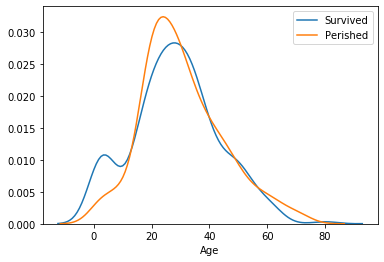

In [0]:
#Plot distributions of the survivor's and non-survivor's age.
ax = sns.distplot(survived.Age.dropna(), hist = False, label='Survived')
ax = sns.distplot(perished.Age.dropna(), hist = False, label='Perished')
ax.legend()

Exercises:
1. What does this plot tell us?
2. Can you amend the code above to visualise how "Survived" depends on other numerical variables in the data?

In [0]:
#Placeholder for your coded solutions to the above exercises.

**2.1.2. Categorical Variables**
Some columns contain factors, meaning that each row will take one of a few predetermined values for that variable. Such variables are called categorical. For example, we know that the 'Embarked' column can take the values "C", "Q", or "S" depending on the port the passenger embarked on the Titanic from.


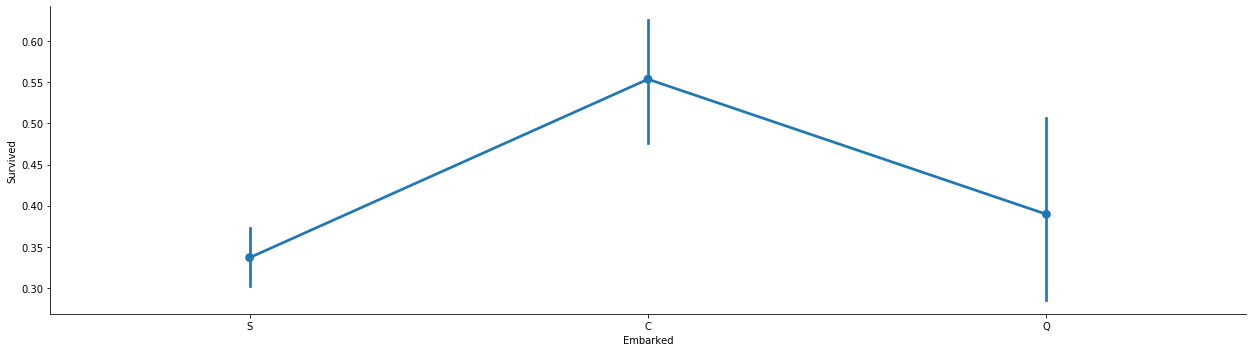

In [0]:
sns.catplot(x='Embarked', y='Survived', data=train_df, kind='point', aspect=3.5)

Exercises:
3. What does this plot tell us?
4. Can you amend the code to visualise how "Survived" depends on other categorical variables in the data?
5. What do the vertical bars behind each point represent?


In [0]:
#Placeholder for your coded solutions to the above exercises.

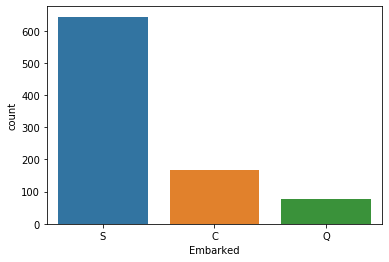

In [0]:
sns.countplot(x='Embarked', data=train_df)

Exercises:

6. What does this plot tell us?
7. How does the information in this plot instruct us regarding exercise 5?
8. Can you amend the code to plot exposure for other variables?

In [0]:
#Placeholder for your coded solutions to the above exercises.

The same method can be used to investigate the correlation between any two variables. For instance, we may expect "Fare" to be related to the passenger's "Pclass", but is there any correlation between it and the port the passenger "Embarked?

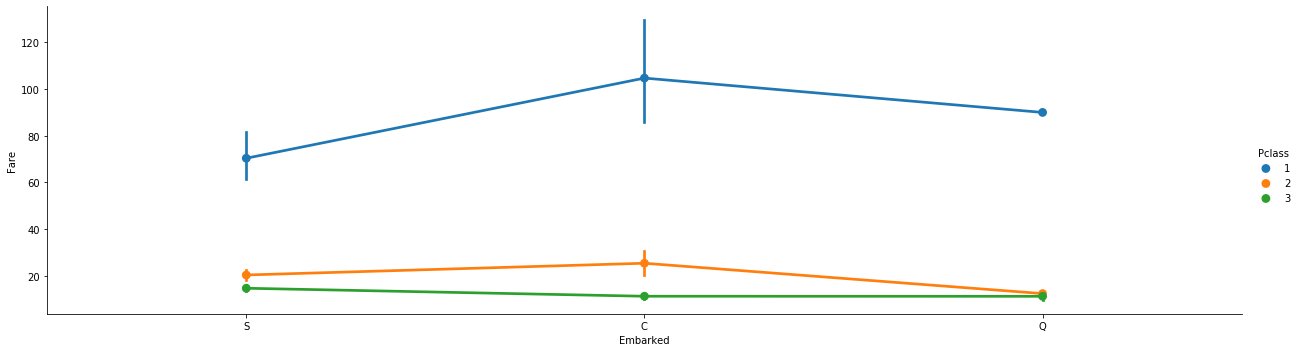

In [0]:
sns.catplot(x='Embarked', y='Fare', hue='Pclass', data=train_df, kind='point', aspect=3.5)

# 3. Data Preparation
**3.1. Imputation**

Some ML algorithms cannot handle missing data gracefully. Regardless of the algorithm applied, it is a good idea to consider mising data and think about how it should be handled. 

In our case we know from above that there are columns with a number of missing values. Actually in the test dataset we havent touched yet, there may yet be additional columns that also have missing values. We need to be careful in our data preparation to ensure that any steps we take, we generalise to the entire dataset and not just the training data. This is often difficult because, in the real world, we often cannot foresee the data our machine learning model will be given to make predictions on -- the data will be entirely new and unknown at the time of training the model.

We'll focus on the "Age" and "Fare" columns for now. The others will be handled differently below. When it comes to filling in the missing data there are many options available to us. In this case, we'll fill the missing values in these "Age" and "Fare" variables to some clearly distinguishible value; minus one.



In [0]:
def fill_nulls(df, columns=['Age', 'Fare']):
  """Fill the missing data in each of the columns with -1"""
  fill_dict={}
  for column in columns:
    fill_dict[column]=-1

  df = df.fillna(fill_dict)
  return df

In [0]:
# For example:
fill_nulls(train_df).isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Exercise:

9. What other values could we use (instead of minus one) to replace the missing "Age" values?

**3.2. Feature Creation**

Consider the "Cabin" variable.




In [0]:
train_df.Cabin.head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [0]:
train_df["Cabin"].nunique()

147

In [0]:
train_df["Cabin"].isna().sum()

687

We have two problems with the data in its current form. 
1. The data in "Cabin" is sparse; of the 891 rows, there are 687 with no data for this variable.
2. When the variable is populated, it is often unique to the individual passenger.
What we would like is some way to extract the useful information from this column, discarding the part that makes it specific to just one or two passengers.
According to https://www.encyclopedia-titanica.org/cabins.html, the alphabetical prefix that we see on a passenger's "cabin" corresponds to the deck where the cabin was situated. This may be helpful information to extract since we might suspect that passengers on lower decks were less able to reach the available lifeboats and would be affected soonest by the rising waters as the ship sank.

In [0]:
def find_deck(row):
  """Extract the deck of each passenger's cabin"""
  cabin=row["Cabin"]

  #If cabin isnt a strin (ie. is NaN) then return nothing.
  if not(isinstance(cabin, str)):
    return pd.np.NaN

  # Remove any leading and trailing white space
  cabin = cabin.strip()

  #deck is initial alphabetical characters of the string
  deck = ""
  for character in cabin:
    if not(character.isalpha()):
      break
    else:
      deck += character

  return deck

In [0]:
def add_deck_column(df):
  """Add the deck column to the dataframe based on the cabin column."""
  df['Deck'] = df.apply(lambda row: find_deck(row), axis=1)
  df=df.drop(columns="Cabin")
  return df


In [0]:
#For example:
train_df_w_deck = add_deck_column(train_df)
train_df_w_deck.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN


In [0]:
train_df_w_deck['Deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

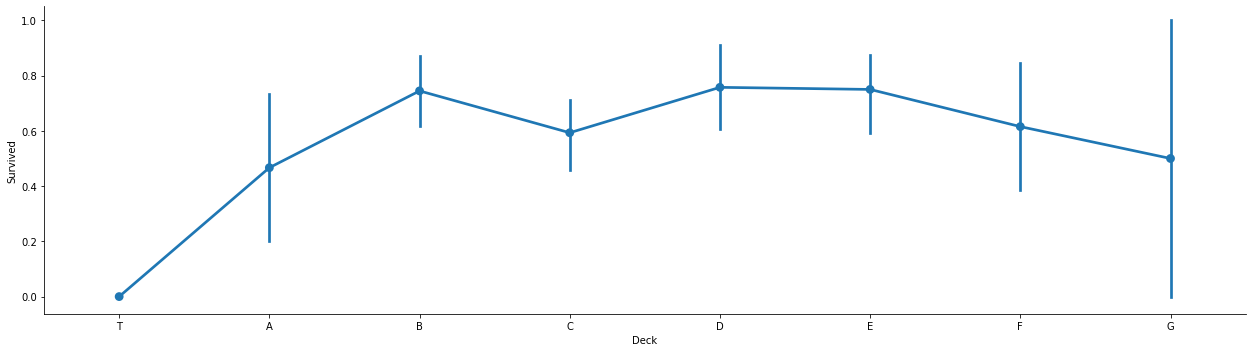

In [0]:
top_to_bottom_decks = ["T", "A", "B", "C", "D", "E", "F", "G"]
sns.catplot(x='Deck', y='Survived', data=train_df_w_deck, kind='point', aspect=3.5, order=top_to_bottom_decks)

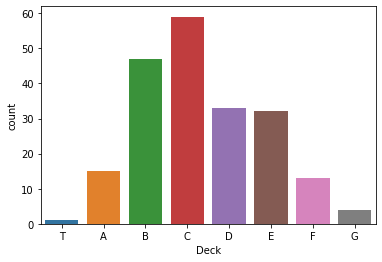

In [0]:
sns.countplot(x='Deck', data=train_df_w_deck, order=top_to_bottom_decks)

There's possibly some signal here. Unfortunately the extremes (upper and lower decks) where we see the most deviation from the mean survival rate is also where there is least observations, meaning the data is less trustworthy.

**3.2. One Hot Encoding**
It is common for categorical variables to be one-hot encoded which transforms them into True/False indicators, one for each factor in the column. Certain machine learning models require factors to be one hot encoded.



In [0]:
def one_hot_encode(df, factors =['Sex', 'Embarked', 'Deck']):
  df_1he = pd.get_dummies(df, columns=factors)
  return df_1he

In [0]:
#For example:
one_hot_encode(train_df).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0


Exercises:
10. Are there any other columns in the data that could be considered as factors?
11. How would we modify the function above to one-hot encode them?
12. Is it advisable to consider such column(s) as factors? What are the pros/cons?

In [0]:
#Placeholder for your coded solutions to the above exercises.

## **Model Training**
**4.1. Feature Exclusion**
For various reasons there are some variables that we dont want to use to make predictions. In other words, we only want our machine leaning model to train using a subset of the available columns.

Passenger ID - this is an ID and therefore has no predictive power.

Survived - this is our label; to use this would be cheating! 

Name - Since this column contains a great deal of unique values we want to guard against over-fitting.

Ticket - Another ID

Cabin - Given the issues described above, this will be engineered into a "Deck" variable instead. 

**4.2. Data Pipeline**

Notice so far we have written all our data transformations in functions. This means that we can easily apply all the steps of our data pipeline to any given dataset with ease. This approach to data manipulation is clean, convenient and much safer since we need to guarantee that the training and test datasets are transformed in exactly the same manner.



In [0]:
def get_features(df, excluded_cols = ["PassengerId", "Survived", "Name", "Ticket", "Cabin"]):
  factors = [c for c in list(df) if c not in excluded_cols]
  return factors

In [0]:
def apply_pipeline(df):
  """Apply all the steps of the data pipeline using defaults"""
  df = fill_nulls(df)
  df = add_deck_column(df)
  df = one_hot_encode(df)
  features = get_features(df)
  df = df[features]
  return df

In [0]:
#Apply all the steps above to the training dataset
train_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.csv')
train_df_prepared = apply_pipeline(train_df)

#Examine the final dataset
train_df_prepared.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,0,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,1,0,0,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,0,0,0,0,0
4,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,0,0,0,0,0,0


**4.2. Build A Model**

It is finally time to apply some machine learning algorithm to our training dataset. There are plenty of possibilities when it comes to choosing an algorithm to apply, many of which will perform well for our purposes.

I've decided to apply logistic regression in the example below since it can be used for classification purposes and is one of the simplest to set up. Many hours could be spent learning about and trying different techniques to this data in an attempt to improve the accuracy of the predictions.



In [0]:
#Scikit-learn offers a suite of machine learning tools for Python.
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_df_prepared, train_df["Survived"])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## **Model Evaluation**
First of all, let's evaluate the accuracy of the model. Namely; what proportion of its predictions it gets correct. Of course, we only know the correct answer for passengers in the training dataset.

In [0]:
#Find the predictions on the training dataset.
truth = train_df["Survived"]
predictions = log_reg.predict(train_df_prepared)

In [0]:
correct = [truth[i] == predictions[i] for i in range(len(truth))]
(sum(correct) / len(truth)) * 100

80.02244668911335

Exercises:
13. What problem arises if we concisely conclude that our model is 80% accurate?
14. How could we more appropriately calculate the accuracy of the model?

We can also create some nice visualisations to better understand how our model is performing.

[Text(0, 0.5, 'Not Survived'), Text(0, 1.5, 'Survived')]

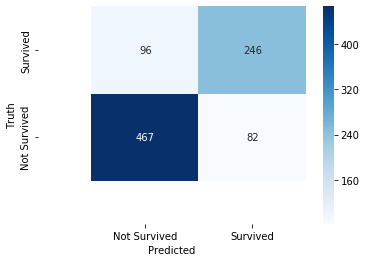

In [0]:
from sklearn.metrics import confusion_matrix

c_m = confusion_matrix(truth, predictions)
ax = sns.heatmap(c_m,
                 annot=True,
                 xticklabels= ["Not Survived", "Survived"],
                 fmt = "d",
                 cmap = "Blues")
ax.set(xlabel="Predicted", ylabel="Truth")
ax.set_xlim(-0.5, 2)
ax.set_ylim(-0.5, 2)
ax.set_yticklabels(("Not Survived", "Survived"), rotation=90, va="center")

Exercise:
15. What does this plot above tell us about our model?

We can do the same kind of univariate analysis that we did in the data exploration section to dig into how our model performing for certain segments of the training dataset.

First, for ease of plotting, we need to merge the predcited data with the known-true data.

In [0]:
train_df["Type"] = "Truth"
predicted_df = train_df.copy()
predicted_df["Survived"] = predictions
predicted_df["Type"] = "Predicted"

truth_plus_predicted = train_df.append(predicted_df, ignore_index=True)

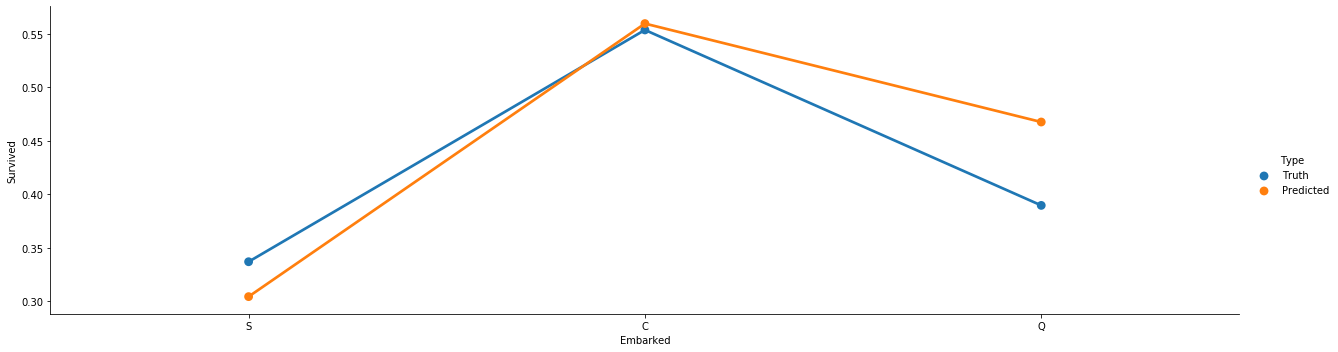

In [0]:
sns.catplot(x='Embarked', y='Survived', data=truth_plus_predicted, hue='Type', kind='point', aspect=3.5, ci=None)

Exercises:
16. What does the plot above tell us about how our model is performing for the "Embarked" variable?
17. Can you modify the code above to perform similar analysis for other variables in the features list?
18. Are there any ideas for how to improve our model's accuracy based on your discoveries? 

In [0]:
#Placeholder for your coded solutions to the above exercises

## **Model Implementation**
# 6.1. Data Preparation

Once we are happy with the accuracy of our model's predictions, we can easily implement it to predict the survivl of passengers we have no ground truth for. But first, we need to prepare the data in the same fashion we did for model training. 

Notice this is the first time we have touched the test dataset so far. This is because we cannot risk peaking at the data we're going to predict on while we're still making updates to our model. If we did, we could introduce bias into our model building process that would mean our model does not generalise well to unseen data.

In [0]:
test_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/test.csv')
test_df_prepared = apply_pipeline(test_df)

We have a subtle but fatal problem!

In [0]:
set(list(test_df_prepared)) == set(list(train_df_prepared))

False

Exercises:
19. Can you figure out what the problem is?
20. Where has this problem came from?

Fixing this problem is relatively easy.

In [0]:
for c in list(train_df_prepared):
  if c not in list(test_df_prepared):
    test_df_prepared[c] = 0

set(list(test_df_prepared)) == set(list(train_df_prepared))

True

# Make Predictions 

In [0]:
test_df["Prediction"] = log_reg.predict(test_df_prepared)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prediction
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [0]:
test_df[["PassengerId", "Prediction"]].to_csv("/content/gdrive/My Drive/Colab Notebooks/predictions.csv", index=False)

In [0]:
test_df[["PassengerId", "Prediction"]]

,PassengerId,Prediction
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## **Conclusion**

We have managed to find some correlation between the information we have on the passengers on board the Titanic and whether they managed to survive. This has cumulated in building a machine learning model which capitalises on these correlations meaning we can use it to make predictions on new data. In doing so, we have leant a number of foundational data exploration, feature engineering, and model building techniques.



## **Ideas for Future Work and Improvements**
1. Can we apply feature engineering to the "SibSp" and "Parch" columns to create a boolean indicator of whether a passenger was traveling alone?
2. Can we apply different machine learning algorithms (other than logistic regression) to the data? How does the performance of these models compare to what we currently have?
3. What effect would bucketing the "Age" variable have on model performance? For example, creating Adult / Child / Senior categories.
4. What information can we extract from the "Ticket" variable?
5. How could we explain how our model worked if we needed to justify its predictions?
6. Are there any other pieces of data that we could find that may be useful in improving our predictions?
